Trying out regularizers,no improvement, doesn't seem to work

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2501].mean(axis=0)
std = float_data[:2501].std(axis=0)
float_data -= mean
float_data /= std

In [ ]:
lookback = 30
step = 1
delay = 1
batch_size = 128

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3] ##### HIT KURDE 1 to numer kolumny ktora przewiduje wtf
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2501,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3001,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3001 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

Best model, regularizer l1 in all layers, val loss constant  0.46,trying without activation in last layer - improvement

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.LSTM(100,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(5,
  activation='softmax',))
model.add(layers.Dense(1,))
model.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history = model.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 65s 153ms/step - loss: 0.8536 - val_loss: 1.0632
Epoch 2/200
400/400 [==============================] - 52s 129ms/step - loss: 0.5309 - val_loss: 0.4910
Epoch 3/200
400/400 [==============================] - 51s 129ms/step - loss: 0.2536 - val_loss: 0.1961
Epoch 4/200
400/400 [==============================] - 51s 127ms/step - loss: 0.1414 - val_loss: 0.0805
Epoch 5/200
400/400 [==============================] - 52s 129ms/step - loss: 0.0980 - val_loss: 0.0752
Epoch 6/200
400/400 [==============================] - 51s 128ms/step - loss: 0.0861 - val_loss: 0.0709
Epoch 7/200
400/400 [==============================] - 51s 128ms/step - loss: 0.0809 - val_loss: 0.0699
Epoch 8/200
400/400 [==============================] - 52s 129ms/step - loss: 0.0780 - val_loss: 0.0645
Epoch 9/200
400/400 [==============================] - 51s 127ms/step - loss: 0.0759 - val_loss: 0.0611
Epoch 10/200
400/400 [==============================] - 51s 127m

In [ ]:
del model

In [ ]:
eval = model.evaluate(test_gen, steps = test_steps)
eval *std[3]

511/511 [==============================] - 13s 25ms/step - loss: 0.0675


0.02519075519697922

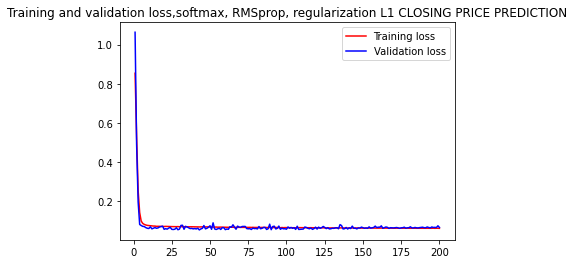

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss,softmax, RMSprop, regularization L1 CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

150 is too much, trying lower


In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(150,
  activation='softmax',
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(5,
  activation='softmax',))
model1.add(layers.Dense(1,))
model1.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=400,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
400/400 [==============================] - 90s 218ms/step - loss: 0.8170 - val_loss: 0.9215
Epoch 2/200
400/400 [==============================] - 88s 220ms/step - loss: 0.3976 - val_loss: 0.2067
Epoch 3/200
400/400 [==============================] - 88s 220ms/step - loss: 0.1652 - val_loss: 0.1575
Epoch 4/200
400/400 [==============================] - 87s 218ms/step - loss: 0.1074 - val_loss: 0.1076
Epoch 5/200
400/400 [==============================] - 89s 222ms/step - loss: 0.0906 - val_loss: 0.0807
Epoch 6/200
400/400 [==============================] - 87s 218ms/step - loss: 0.0837 - val_loss: 0.0680
Epoch 7/200
400/400 [==============================] - 88s 220ms/step - loss: 0.0799 - val_loss: 0.0631
Epoch 8/200
400/400 [==============================] - 88s 221ms/step - loss: 0.0782 - val_loss: 0.0609
Epoch 9/200
400/400 [==============================] - 88s 219ms/step - loss: 0.0765 - val_loss: 0.0565
Epoch 10/200
400/400 [==============================] - 87s 218m